In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dataworkshop_matrix"

/content/drive/My Drive/Colab Notebooks/dataworkshop_matrix


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory = False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

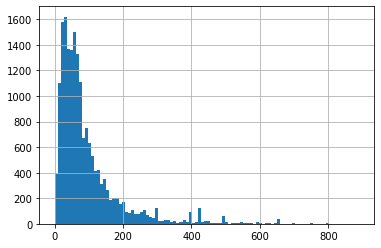

In [0]:
df['prices_amountmin'].hist(bins=100)

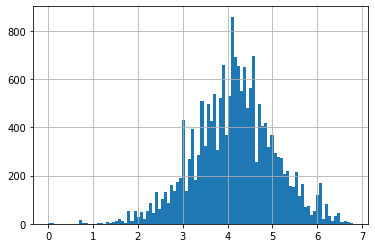

In [0]:
np.log1p( df['prices_amountmin'] ).hist(bins=100)

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean ( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.brand.value_counts()

Nike              1709
PUMA               574
Ralph Lauren       524
New Balance        361
VANS               356
                  ... 
munsingwear          1
Vineyard Vines       1
RYAN SEACREST        1
DRAGON               1
EDDIE BAUER          1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand'].factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
feats = ['brand_cat']
x = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, x, y, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
def run_model(feats):
  x = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, x, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df.manufacturer.value_counts()

Puma                      476
Nike                      374
New Balance               249
VANS                      170
Reebok                    128
                         ... 
Coronado                    1
Principle Plastics Inc      1
Firefly                     1
Urban Pipeline              1
Pacific Shoe Corp.          1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer'].factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Maui And Sons', 'Twisted X', 'Puma', 'Filament', 'Robert Wayne',
        'Roper', 'Puentes Denver', 'Elan Polo', 'SoftScience', 'Dr. Martens',
        ...
        'MF Western', 'Luxottica', 'Minav Corp.', 'Rainbow Sandals',
        'Muck Boots', 'AH by Android Homme', 'Rubies Costume Co', 'Vasque',
        'POLO Ralph Lauren', 'HEAD'],
       dtype='object', length=618))

In [0]:
df['manufacturer_type'] = df['manufacturer'].factorize()[0]

In [0]:
def run_model(feats):
  x = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, x, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['manufacturer_type'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['brand_cat', 'manufacturer_type'])

(-58.539304199085976, 4.311223231615447)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [46]:
ls

data/             day4_matrix_one_two/  LICENSE
day3_matrix_one/  HelloGithub.ipynb     README.md


In [47]:
ls day4_matrix_one_two

day4.ipynb  day4_matrix_one.ipynb


In [0]:
!git add day3_matrix_one/day3.ipynb